# Project 2 - Customer Segments by Danielle Shelton

For Project 1 and Project 2 I chose to use the dataset Customer Segments. This dataset includes both numerical and categorical data given in three different datatypes. For Project 2 I chose to use Logistic Regression because we are looking for a constant output, in this case the gender of the customers. 

In [1]:
#--Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
#--Import dataset and view the first few rows

df = pd.read_csv("Customer_Segments.csv")
df.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience   
0  462809    Male           No   22        No     Healthcare              1.0  \
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

# Project 1 - EDA

Start by collecting info on rows and features - number of rows and columns, feature names and datatypes and if there are any null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Descriptive Statistics

In [5]:
df.describe()

ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000

Looking at the descriptive statistics for Family_Size we see the 25th percentile is 2, the 50th is 3, and the 75th is 4 people. The minimum of 1 makes sense and a max of 9 shows there are some larger families but those would be outliers. Even the mean of 2.85 is close to the median of 3. Compare this to Work_Experience and its a different story. Having a minimum of 0 years of work experience given the minimum Age is 18 makes sense. But the mean and median Age are both 40 or older so to have a mean work experience of 2.64 and a median of 1 raises questions. 

In [6]:
df.mode()

ID Gender Ever_Married   Age Graduated Profession  Work_Experience   
0     458982   Male          Yes  35.0       Yes     Artist              1.0  \
1     458983    NaN          NaN   NaN       NaN        NaN              NaN   
2     458984    NaN          NaN   NaN       NaN        NaN              NaN   
3     458985    NaN          NaN   NaN       NaN        NaN              NaN   
4     458986    NaN          NaN   NaN       NaN        NaN              NaN   
...      ...    ...          ...   ...       ...        ...              ...   
8063  467969    NaN          NaN   NaN       NaN        NaN              NaN   
8064  467971    NaN          NaN   NaN       NaN        NaN              NaN   
8065  467972    NaN          NaN   NaN       NaN        NaN              NaN   
8066  467973    NaN          NaN   NaN       NaN        NaN              NaN   
8067  467974    NaN          NaN   NaN       NaN        NaN              NaN   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low          2.0  Cat_6            D  
1               NaN          NaN    NaN          NaN  
2               NaN          NaN    NaN          NaN  
3               NaN          NaN    NaN          NaN  
4               NaN          NaN    NaN          NaN  
...             ...          ...    ...          ...  
8063            NaN          NaN    NaN          NaN  
8064            NaN          NaN    NaN          NaN  
8065            NaN          NaN    NaN          NaN  
8066            NaN          NaN    NaN          NaN  
8067            NaN          NaN    NaN          NaN  

[8068 rows x 11 columns]

To replace the Null values I used the median value for Family_Size and the mode for Ever_Married, Graduated, and Profession.

In [7]:
df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].median())

In [8]:
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [9]:
df['Graduated'] = df['Graduated'].fillna(df['Graduated'].mode()[0])

In [10]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

I used One Hot Encoding to convert categorical data with two unique elements to numerical data. 

In [11]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['Gender', 'Ever_Married', 'Graduated'])
print(one_hot_encoded_df)

          ID  Age     Profession  Work_Experience Spending_Score  Family_Size   
0     462809   22     Healthcare              1.0            Low          4.0  \
1     462643   38       Engineer              NaN        Average          3.0   
2     466315   67       Engineer              1.0            Low          1.0   
3     461735   67         Lawyer              0.0           High          2.0   
4     462669   40  Entertainment              NaN           High          6.0   
...      ...  ...            ...              ...            ...          ...   
8063  464018   22         Artist              0.0            Low          7.0   
8064  464685   35      Executive              3.0            Low          4.0   
8065  465406   33     Healthcare              1.0            Low          1.0   
8066  467299   27     Healthcare              1.0            Low          4.0   
8067  461879   37      Executive              0.0        Average          3.0   

      Var_1 Segmentation  G

In [12]:
#--Rename the dataset for simplicity 
df1 = one_hot_encoded_df
df1

ID  Age     Profession  Work_Experience Spending_Score  Family_Size   
0     462809   22     Healthcare              1.0            Low          4.0  \
1     462643   38       Engineer              NaN        Average          3.0   
2     466315   67       Engineer              1.0            Low          1.0   
3     461735   67         Lawyer              0.0           High          2.0   
4     462669   40  Entertainment              NaN           High          6.0   
...      ...  ...            ...              ...            ...          ...   
8063  464018   22         Artist              0.0            Low          7.0   
8064  464685   35      Executive              3.0            Low          4.0   
8065  465406   33     Healthcare              1.0            Low          1.0   
8066  467299   27     Healthcare              1.0            Low          4.0   
8067  461879   37      Executive              0.0        Average          3.0   

      Var_1 Segmentation  Gender_Female  Gender_Male  Ever_Married_No   
0     Cat_4            D          False         True             True  \
1     Cat_4            A           True        False            False   
2     Cat_6            B           True        False            False   
3     Cat_6            B          False         True            False   
4     Cat_6            A           True        False            False   
...     ...          ...            ...          ...              ...   
8063  Cat_1            D          False         True             True   
8064  Cat_4            D          False         True             True   
8065  Cat_6            D           True        False             True   
8066  Cat_6            B           True        False             True   
8067  Cat_4            B          False         True            False   

      Ever_Married_Yes  Graduated_No  Graduated_Yes  
0                False          True          False  
1                 True         False           True  
2                 True         False           True  
3                 True         False           True  
4                 True         False           True  
...                ...           ...            ...  
8063             False          True          False  
8064             False          True          False  
8065             False         False           True  
8066             False         False           True  
8067              True         False           True  

[8068 rows x 14 columns]

Use .replace to convert Categorical Data to Numerical Data in columns with more than two unique elements.

In [13]:
#--Segmentation column
df1 = df1.replace( {'A':1, 'B':2, 'C':3, 'D':4} )

In [14]:
#--Spending_Score column
df1 = df1.replace( {'Low':1, 'Average':2, 'High':3} )

In [15]:
#--Profession column
df1 = df1.replace( {'Artist':1, 'Healthcare':2, 'Entertainment':3, 'Engineer':4, 'Doctor':5, 'Lawyer':6, 'Executive':7, 'Marketing':8, 'Homemaker':9} )

In [16]:
df1

ID  Age  Profession  Work_Experience  Spending_Score  Family_Size   
0     462809   22           2              1.0               1          4.0  \
1     462643   38           4              NaN               2          3.0   
2     466315   67           4              1.0               1          1.0   
3     461735   67           6              0.0               3          2.0   
4     462669   40           3              NaN               3          6.0   
...      ...  ...         ...              ...             ...          ...   
8063  464018   22           1              0.0               1          7.0   
8064  464685   35           7              3.0               1          4.0   
8065  465406   33           2              1.0               1          1.0   
8066  467299   27           2              1.0               1          4.0   
8067  461879   37           7              0.0               2          3.0   

      Var_1  Segmentation  Gender_Female  Gender_Male  Ever_Married_No   
0     Cat_4             4          False         True             True  \
1     Cat_4             1           True        False            False   
2     Cat_6             2           True        False            False   
3     Cat_6             2          False         True            False   
4     Cat_6             1           True        False            False   
...     ...           ...            ...          ...              ...   
8063  Cat_1             4          False         True             True   
8064  Cat_4             4          False         True             True   
8065  Cat_6             4           True        False             True   
8066  Cat_6             2           True        False             True   
8067  Cat_4             2          False         True            False   

      Ever_Married_Yes  Graduated_No  Graduated_Yes  
0                False          True          False  
1                 True         False           True  
2                 True         False           True  
3                 True         False           True  
4                 True         False           True  
...                ...           ...            ...  
8063             False          True          False  
8064             False          True          False  
8065             False         False           True  
8066             False         False           True  
8067              True         False           True  

[8068 rows x 14 columns]

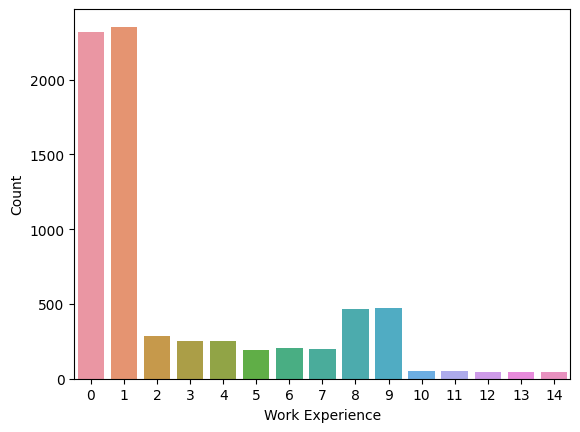

In [17]:
sns.countplot(x='Work_Experience', data=df1)
plt.ylabel("Count")
plt.xlabel("Work Experience")
labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
plt.xticks(range(15), labels)
plt.show()

<Axes: xlabel='Age', ylabel='Work_Experience'>

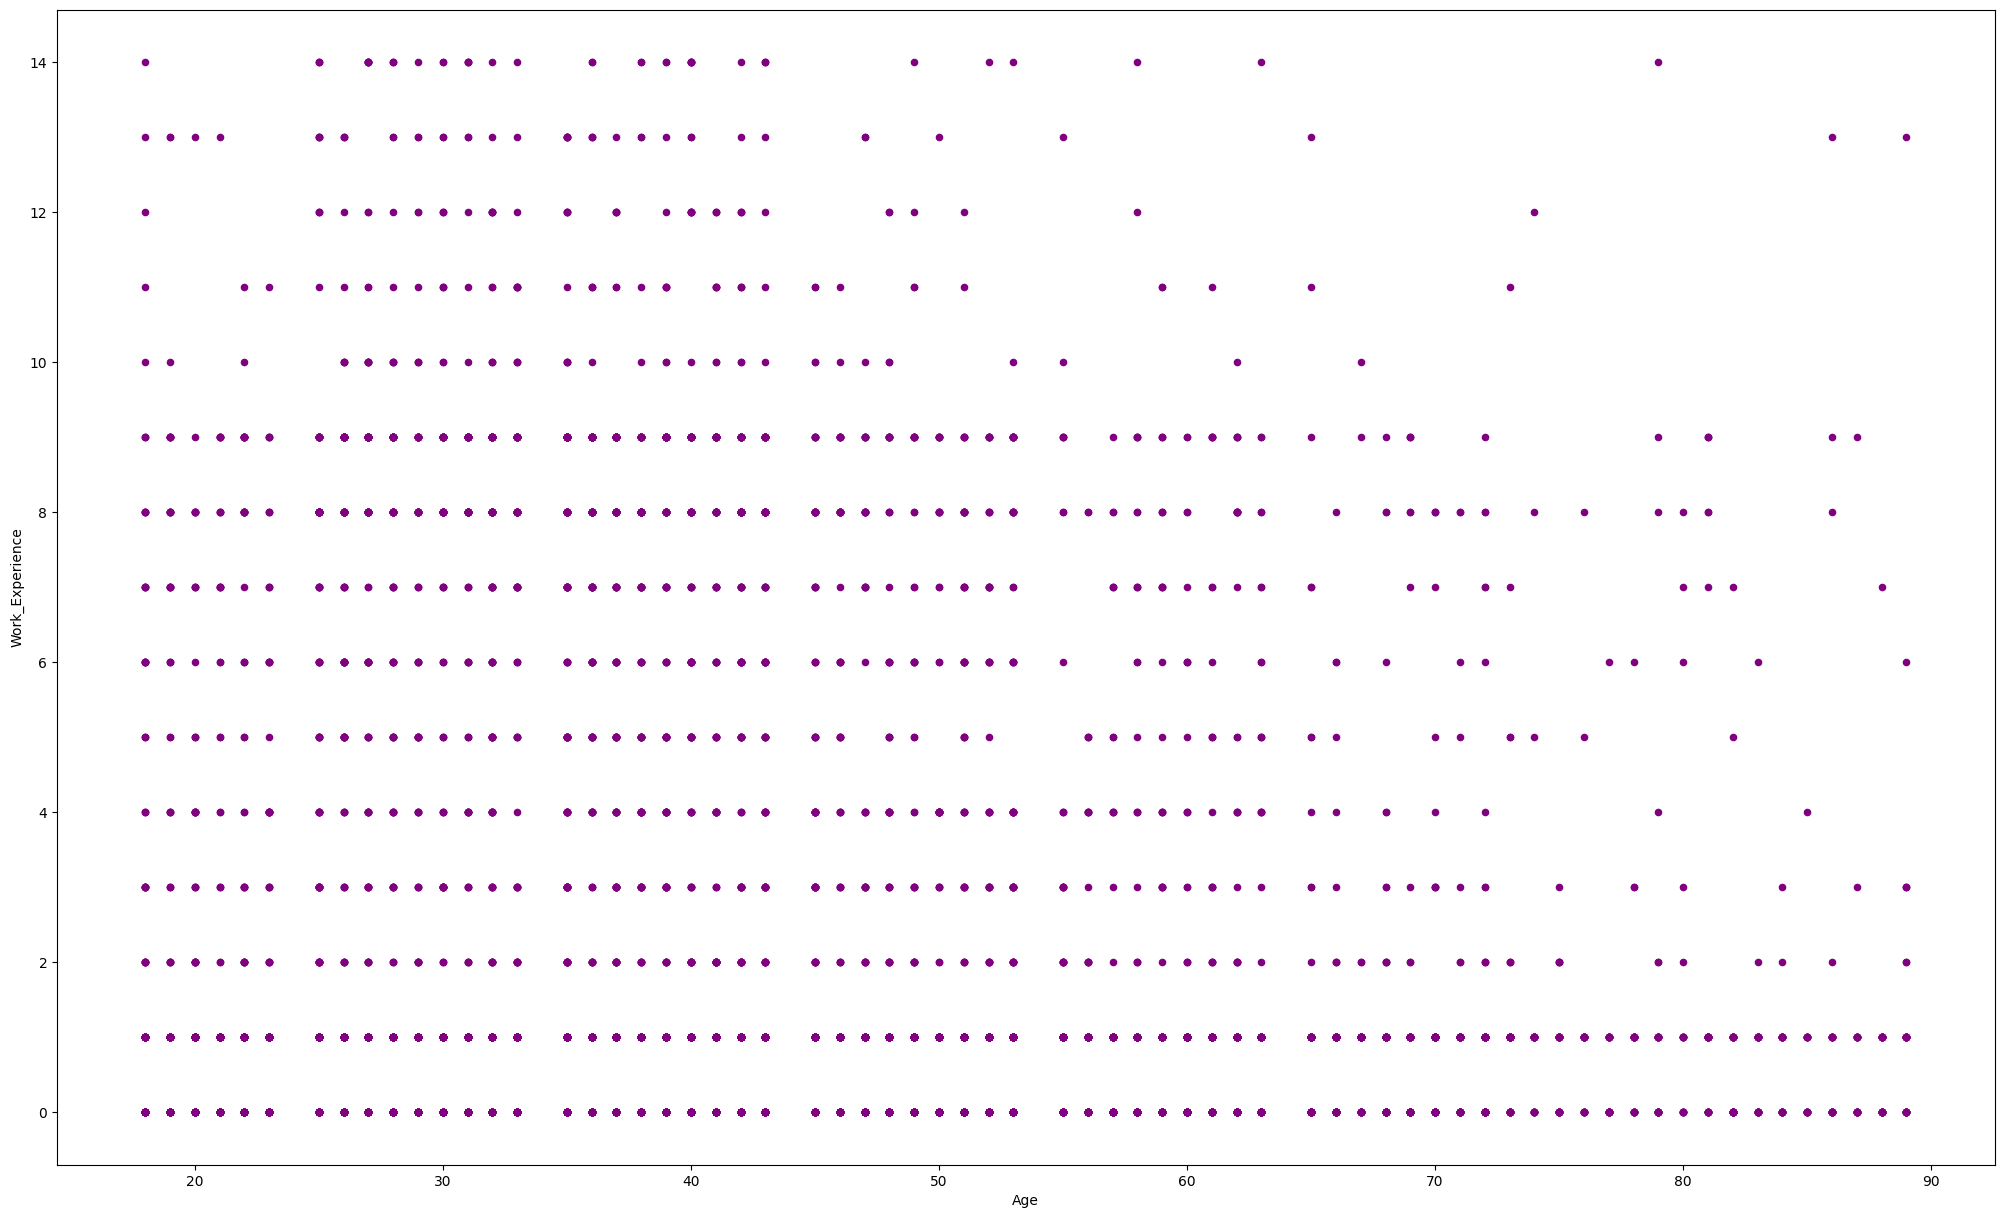

In [18]:
df1[['Age','Work_Experience']].plot(kind='scatter', x='Age',y='Work_Experience', color='purple', figsize=(25,15))

Using a scatterplot we see 20-somethings with 14 years of experience and 0-1 years of experience running all the way up to the oldest customer. 

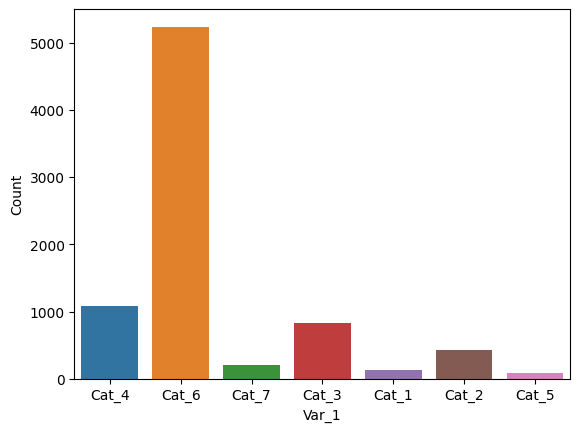

In [19]:
sns.countplot(x='Var_1', data=df1)
plt.ylabel("Count")
plt.xlabel("Var_1")
plt.show()

Var_1 is made up of elements like Cat_4, Cat_6, and Cat_1. I didn't know what these meant or how many of them there were so I again used countplot to see the breakdown of where Customers fell and how many categories there were. While I still don't know what these categories mean I do know that the vast majority of customers, over 5000 of them, are in Cat_6. 

In [20]:
#--Now that I know how many categories there are I can use .replace to convert them to numerical values.
df1 = df1.replace( {'Cat_1':1, 'Cat_2':2, 'Cat_3':3, 'Cat_4':4, 'Cat_5':5, 'Cat_6':6, 'Cat_7':7} )

In [21]:
#--Use forward fill (ffill) to fill in the values of the 76 null values in the Var_1 column
df1["Var_1"].fillna( method ='ffill', inplace = True)

In [22]:
#--Create new dataset that only includes features I plan to work with
df2 = df1[['Gender_Male','Ever_Married_Yes','Age','Graduated_Yes','Profession','Spending_Score','Family_Size', 'Var_1','Segmentation']]
df2

Gender_Male  Ever_Married_Yes  Age  Graduated_Yes  Profession   
0            True             False   22          False           2  \
1           False              True   38           True           4   
2           False              True   67           True           4   
3            True              True   67           True           6   
4           False              True   40           True           3   
...           ...               ...  ...            ...         ...   
8063         True             False   22          False           1   
8064         True             False   35          False           7   
8065        False             False   33           True           2   
8066        False             False   27           True           2   
8067         True              True   37           True           7   

      Spending_Score  Family_Size  Var_1  Segmentation  
0                  1          4.0    4.0             4  
1                  2          3.0    4.0             1  
2                  1          1.0    6.0             2  
3                  3          2.0    6.0             2  
4                  3          6.0    6.0             1  
...              ...          ...    ...           ...  
8063               1          7.0    1.0             4  
8064               1          4.0    4.0             4  
8065               1          1.0    6.0             4  
8066               1          4.0    6.0             2  
8067               2          3.0    4.0             2  

[8068 rows x 9 columns]

In [23]:
#--Confirm there are no null values left
df2.isnull().sum()

Gender_Male         0
Ever_Married_Yes    0
Age                 0
Graduated_Yes       0
Profession          0
Spending_Score      0
Family_Size         0
Var_1               0
Segmentation        0
dtype: int64

Pie charts and Bar graphs 

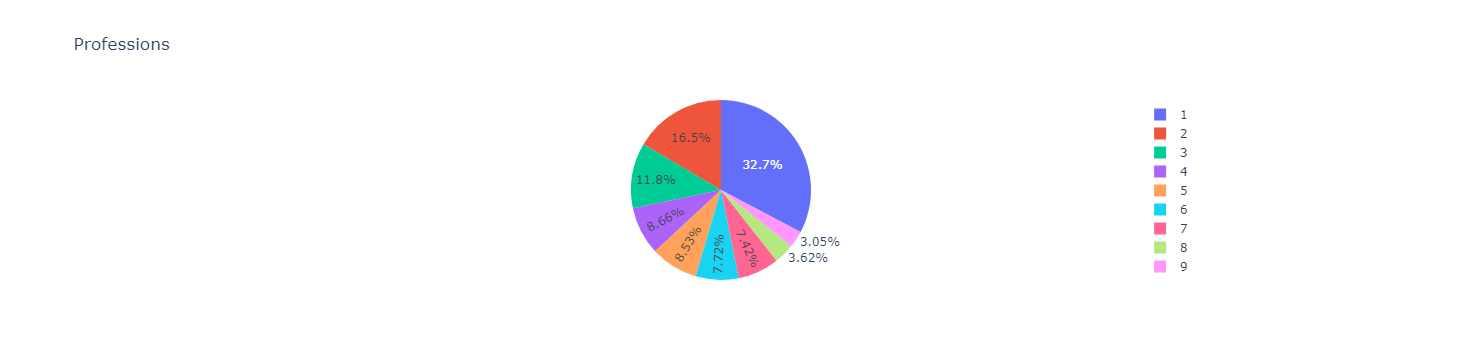

In [24]:
px.pie(df2,names='Profession', title='Professions')

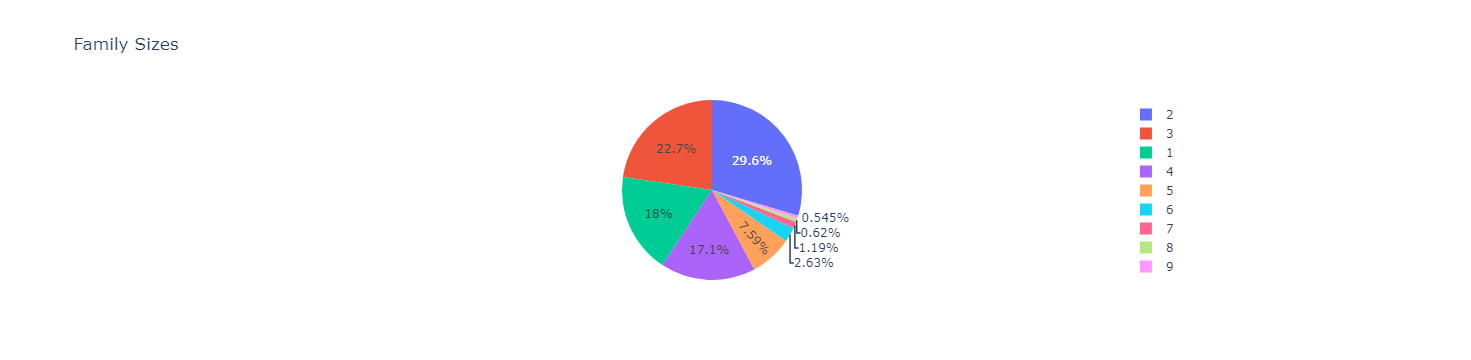

In [25]:
px.pie(df2,names='Family_Size', title='Family Sizes')

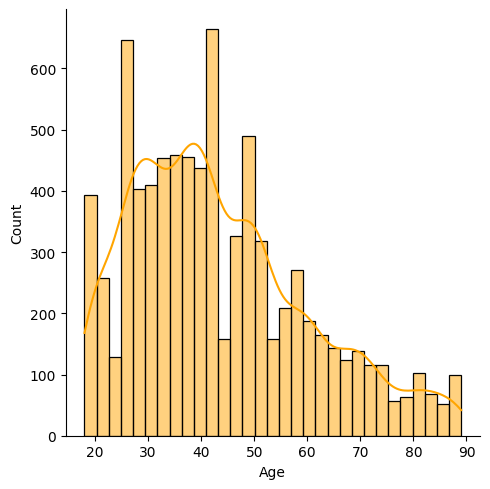

In [26]:
sns.displot(x='Age', data=df2, color='orange', kde=True)

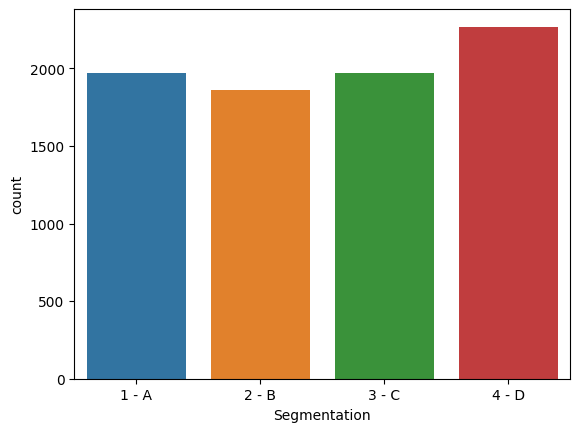

In [27]:
sns.countplot(x='Segmentation', data=df2)
labels = ['1 - A','2 - B','3 - C','4 - D']
plt.xticks(range(4), labels)
plt.show()

The name of this dataset is Customer Segments and yet when looking at the breakdown of Segmentation it isn't all that dramatatic. I found that interesting. 

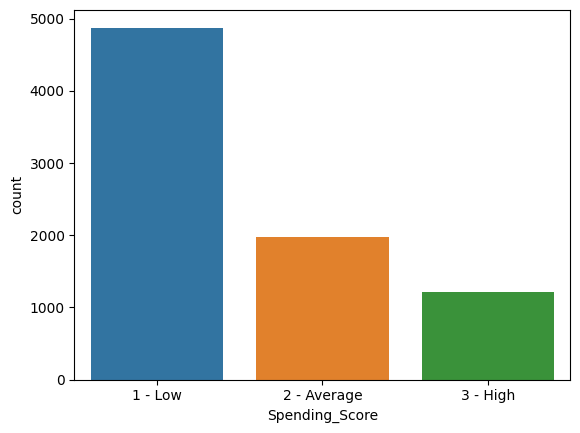

In [28]:
sns.countplot(x='Spending_Score', data=df2)
labels = ['1 - Low','2 - Average','3 - High']
plt.xticks(range(3), labels)
plt.show()

Without editional info we don't know if a Low or High spending score is good. Is this equivalent to golf or one's credit score? Regardless, the majority of customers have a Low score.

In [29]:
df2['Graduated_Yes'].value_counts()

Graduated_Yes
True     5046
False    3022
Name: count, dtype: int64

62.5% of the Customers have graduated - from HS, college? We don't know, but still a positive. 

In [30]:
df2['Gender_Male'].value_counts()

Gender_Male
True     4417
False    3651
Name: count, dtype: int64

54.75% of the Customers are Men.

In [31]:
df2['Ever_Married_Yes'].value_counts()

Ever_Married_Yes
True     4783
False    3285
Name: count, dtype: int64

59.3% of the Customers have been married at some point. This question doesn't specify if they are married currently or in the past so its a broad question. 

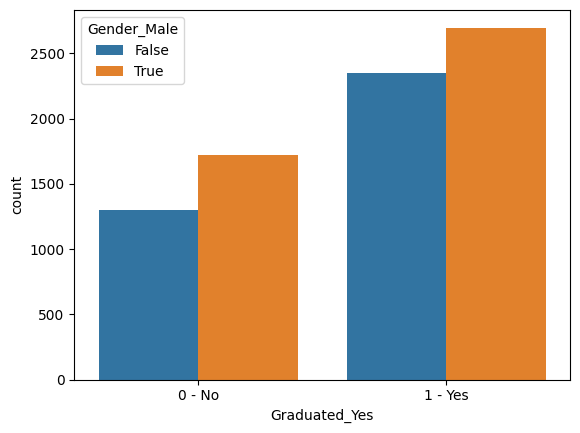

In [32]:
sns.countplot(x='Graduated_Yes', hue='Gender_Male', data=df2)
labels = ['0 - No','1 - Yes']
plt.xticks(range(2), labels)
plt.show()

A comparison of Gender and Graduated. Shown earlier, more customers have graduated then not. This shows the breakdown by sex. In both categories men lead the way but it looks as though the gap between men and women is slightly bigger amongst those who didn't graduate. 

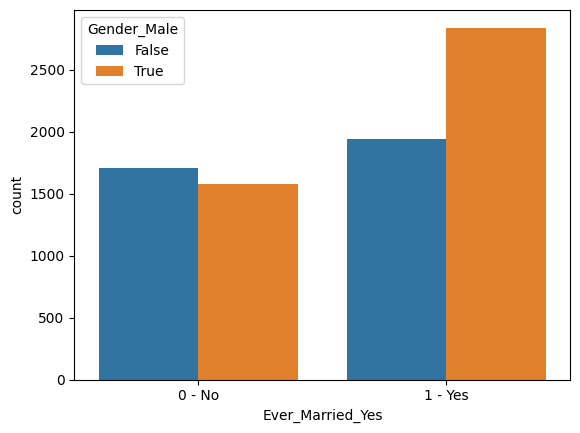

In [33]:
sns.countplot(x='Ever_Married_Yes', hue='Gender_Male', data=df2)
labels = ['0 - No','1 - Yes']
plt.xticks(range(2), labels)
plt.show()

A comparison of Marriage and Gender. For those who have been married there is a large gap between men and women with significantly more men having been married. For those who have never been married, women are slightly ahead. I find this comparison interesting. To know the breakdown of marriage status - currently married, divorced, number of marriages, would explain alot.

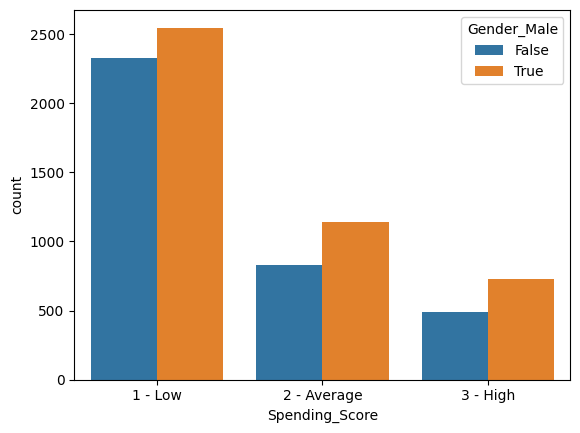

In [34]:
sns.countplot(x='Spending_Score', hue='Gender_Male', data=df2)
labels = ['1 - Low','2 - Average','3 - High']
plt.xticks(range(3), labels)
plt.show()

Similar to the comparison between Gender and Graduated, men are ahead in all three Spending Score categories and Segmentation below. I am curious about the difference between men and women in Segment D shown below.

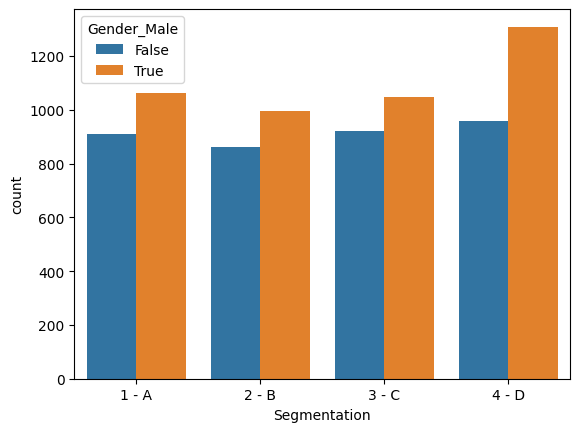

In [35]:
sns.countplot(x='Segmentation', hue='Gender_Male', data=df2)
labels = ['1 - A','2 - B','3 - C','4 - D']
plt.xticks(range(4), labels)
plt.show()

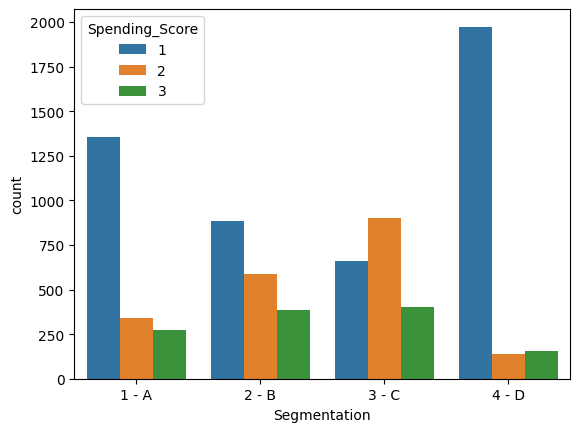

In [36]:
sns.countplot(x='Segmentation', hue='Spending_Score', data=df2)
labels = ['1 - A','2 - B','3 - C','4 - D']
plt.xticks(range(4), labels)
plt.show()

A comparison of Spending Score and Segmentation. Segment C has the least amount of Blue(Low scores) and most of the Orange(Average) and Green(High) scores. Similarly Segment D has most of the Low scores and the least of Average and High scores. 

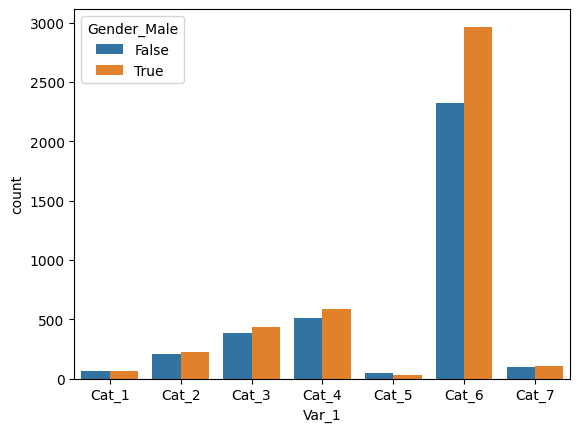

In [37]:
sns.countplot(x='Var_1', hue='Gender_Male', data=df2)
labels = ['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7']
plt.xticks(range(7), labels)
plt.show()

Reaffirming what was shown earlier, the majority of customers fall into Cat_6.

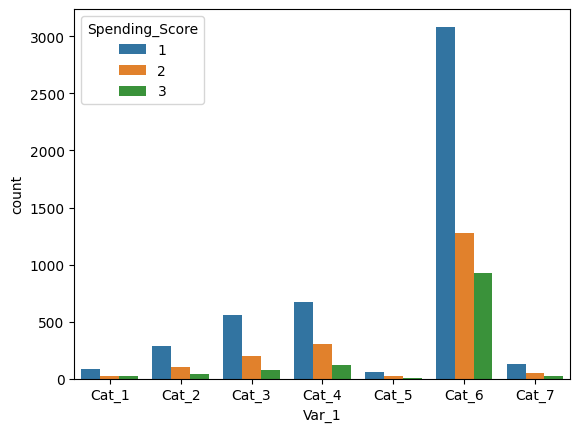

In [38]:
sns.countplot(x='Var_1', hue='Spending_Score', data=df2)
labels = ['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7']
plt.xticks(range(7), labels)
plt.show()

<Axes: >

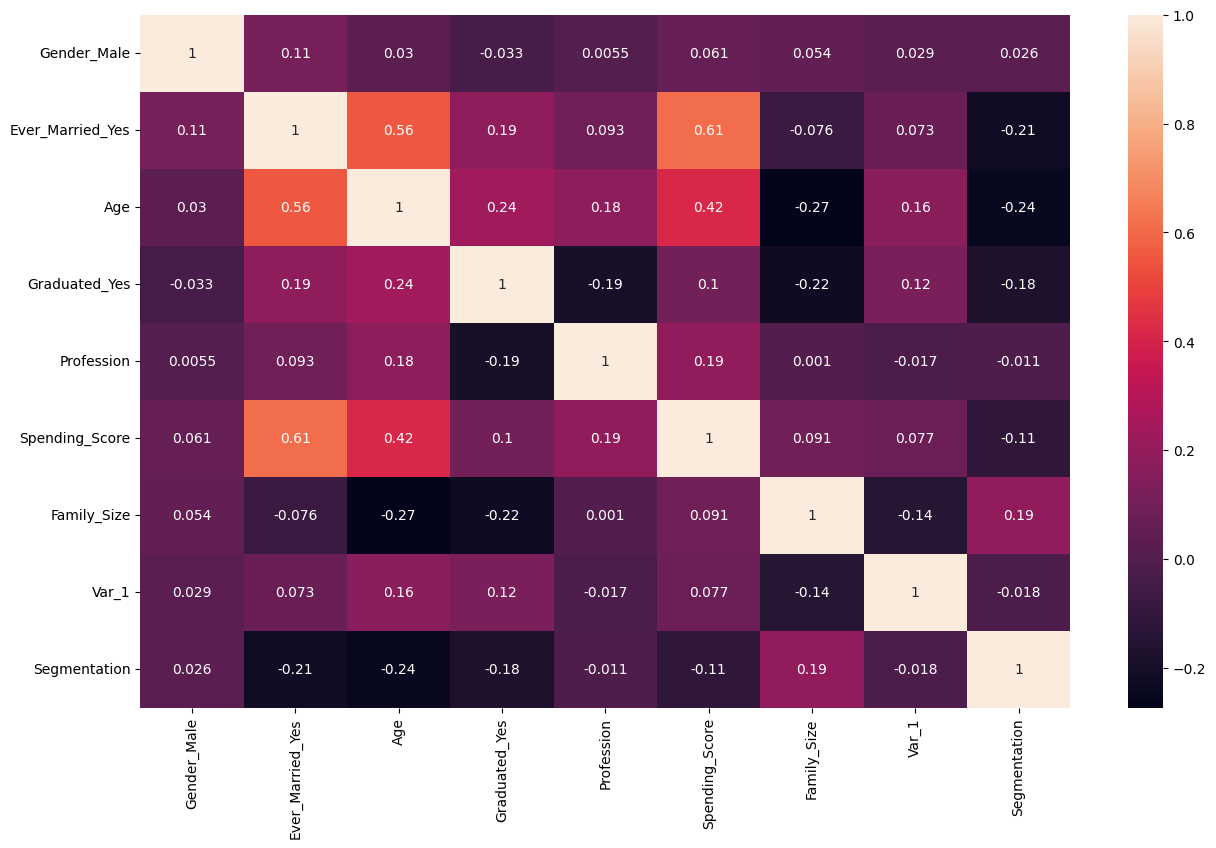

In [39]:
corr_map =df2.corr()
fig=plt.figure(figsize=(15,9))
sns.heatmap(corr_map, annot=True)

Correlation map is pretty dark. There exists a fair amount of negatively correlating features as well as low positive correlations. Age and Marriage seem to have a positive correlation, as does Spending Score and Marriage, and Spending Score and Age. 

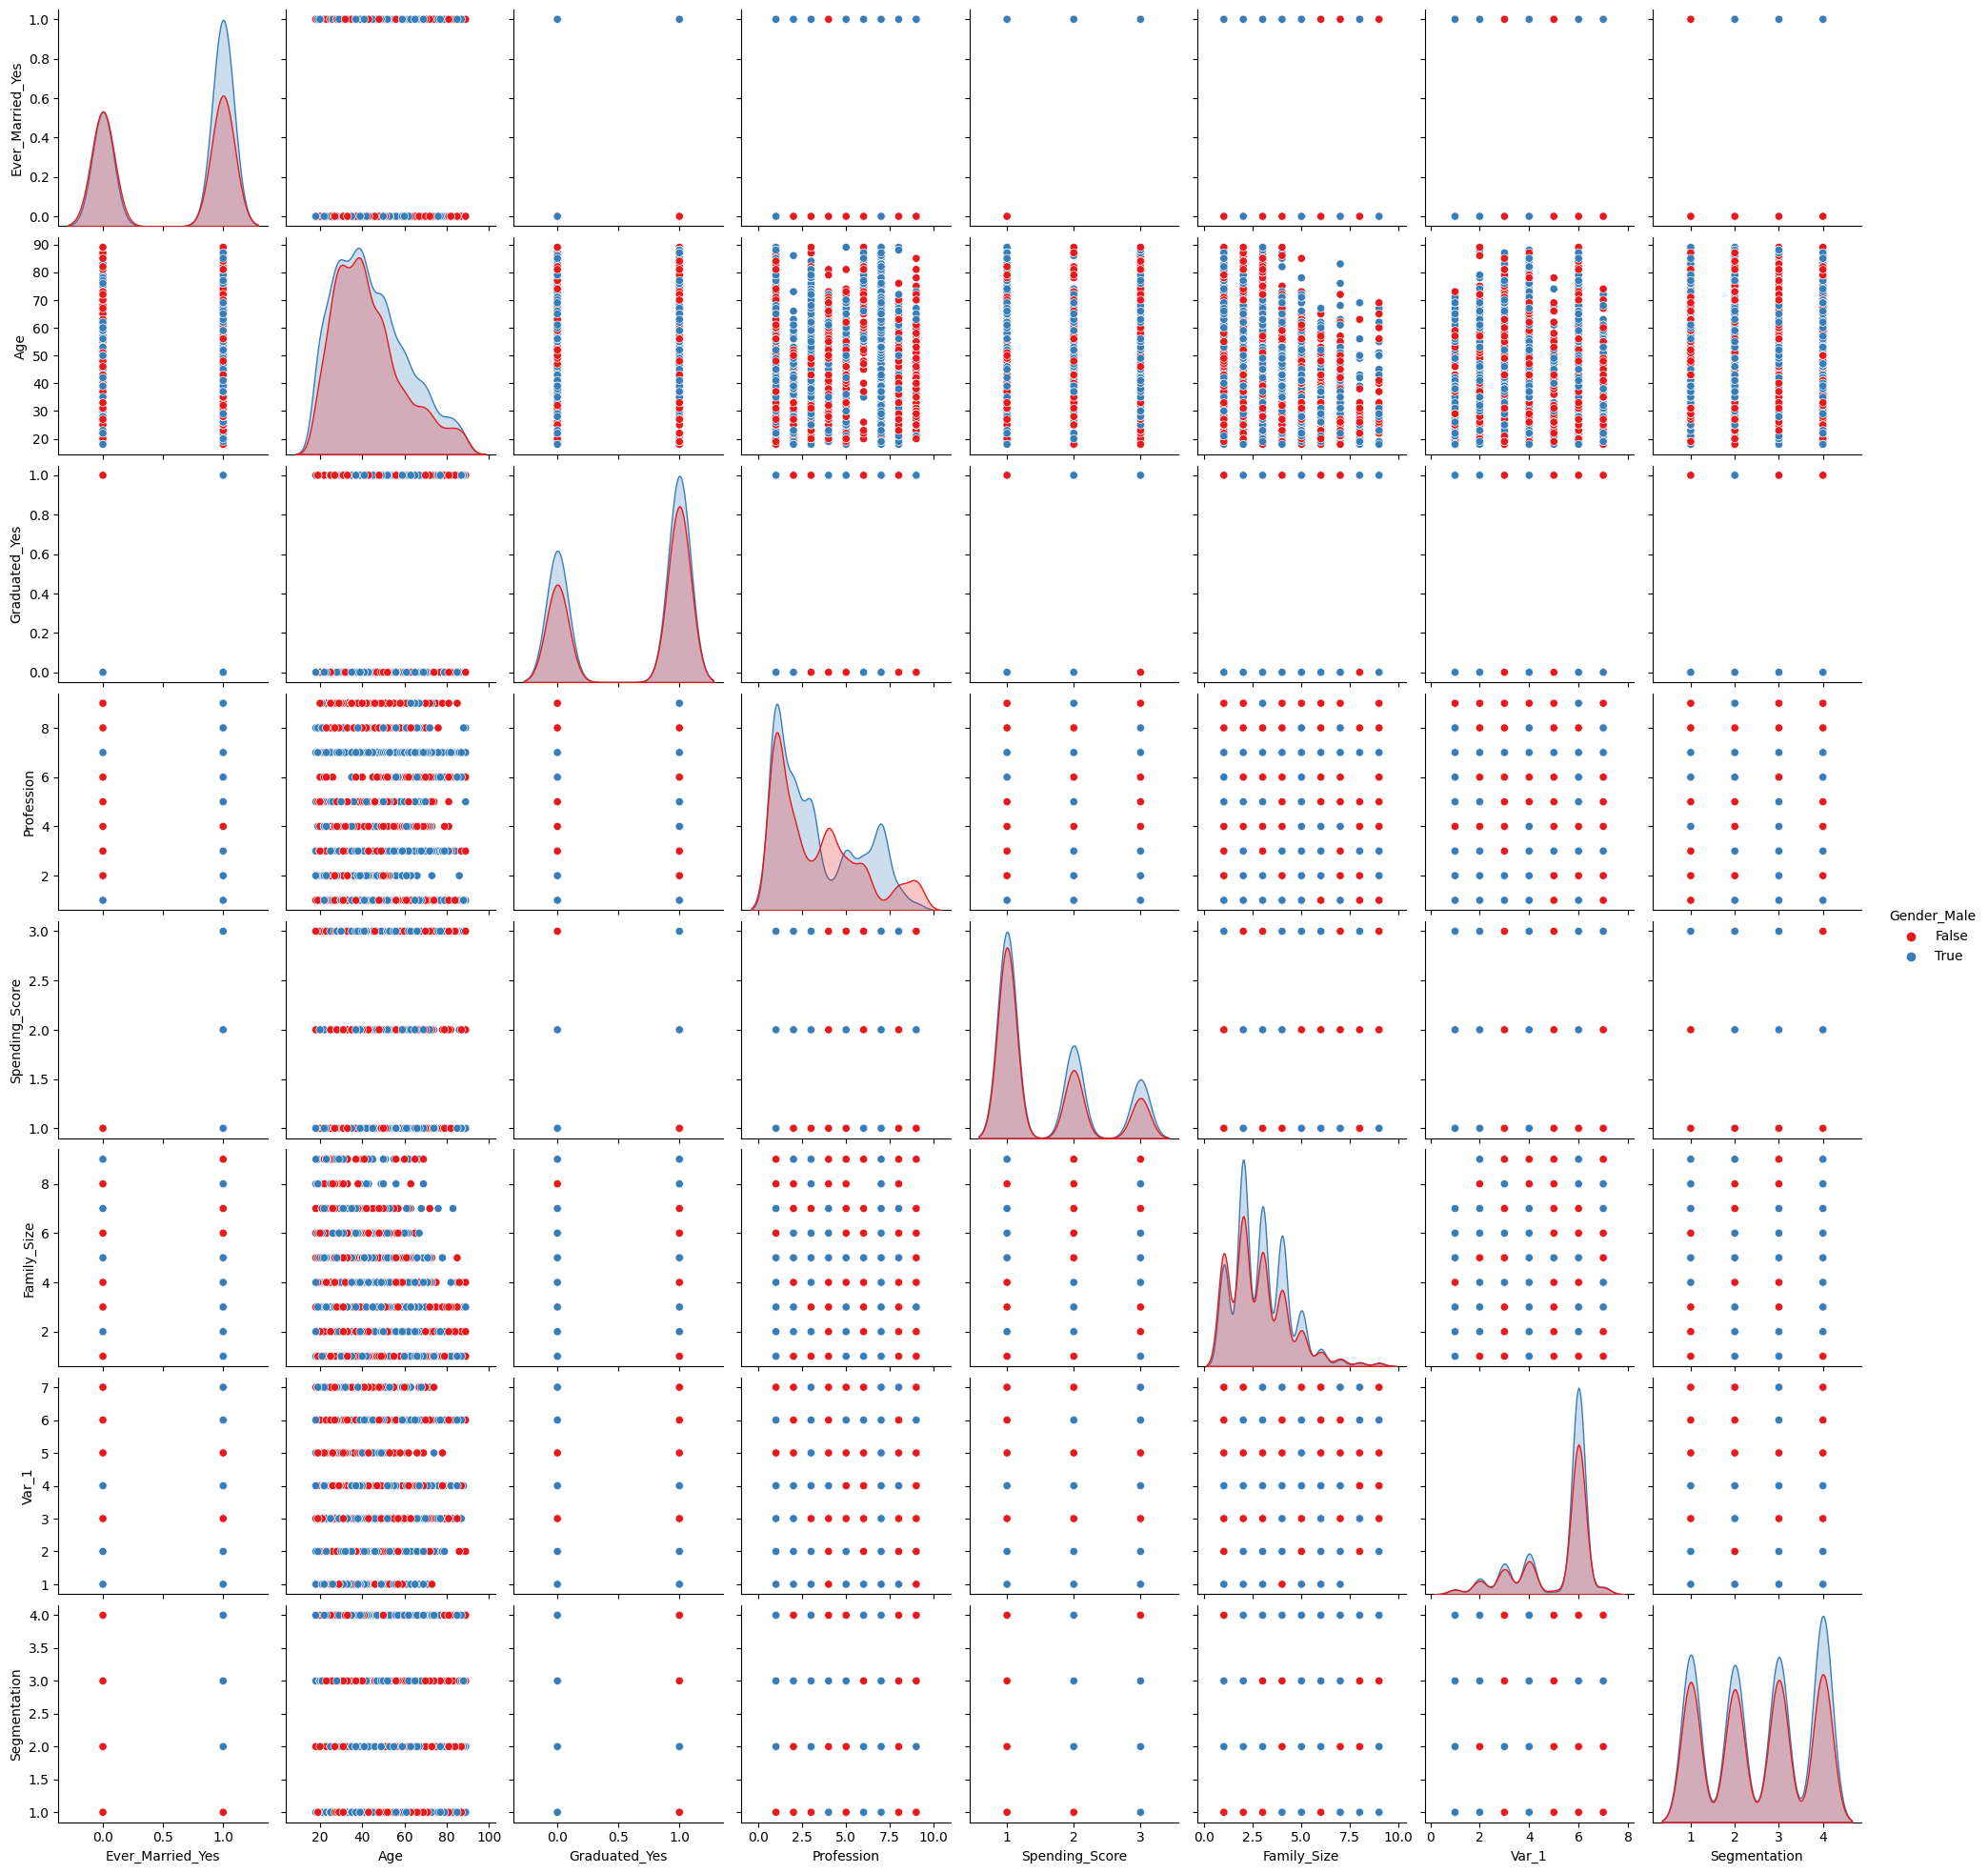

In [40]:
sns.pairplot(df2, hue = 'Gender_Male', palette = 'Set1')

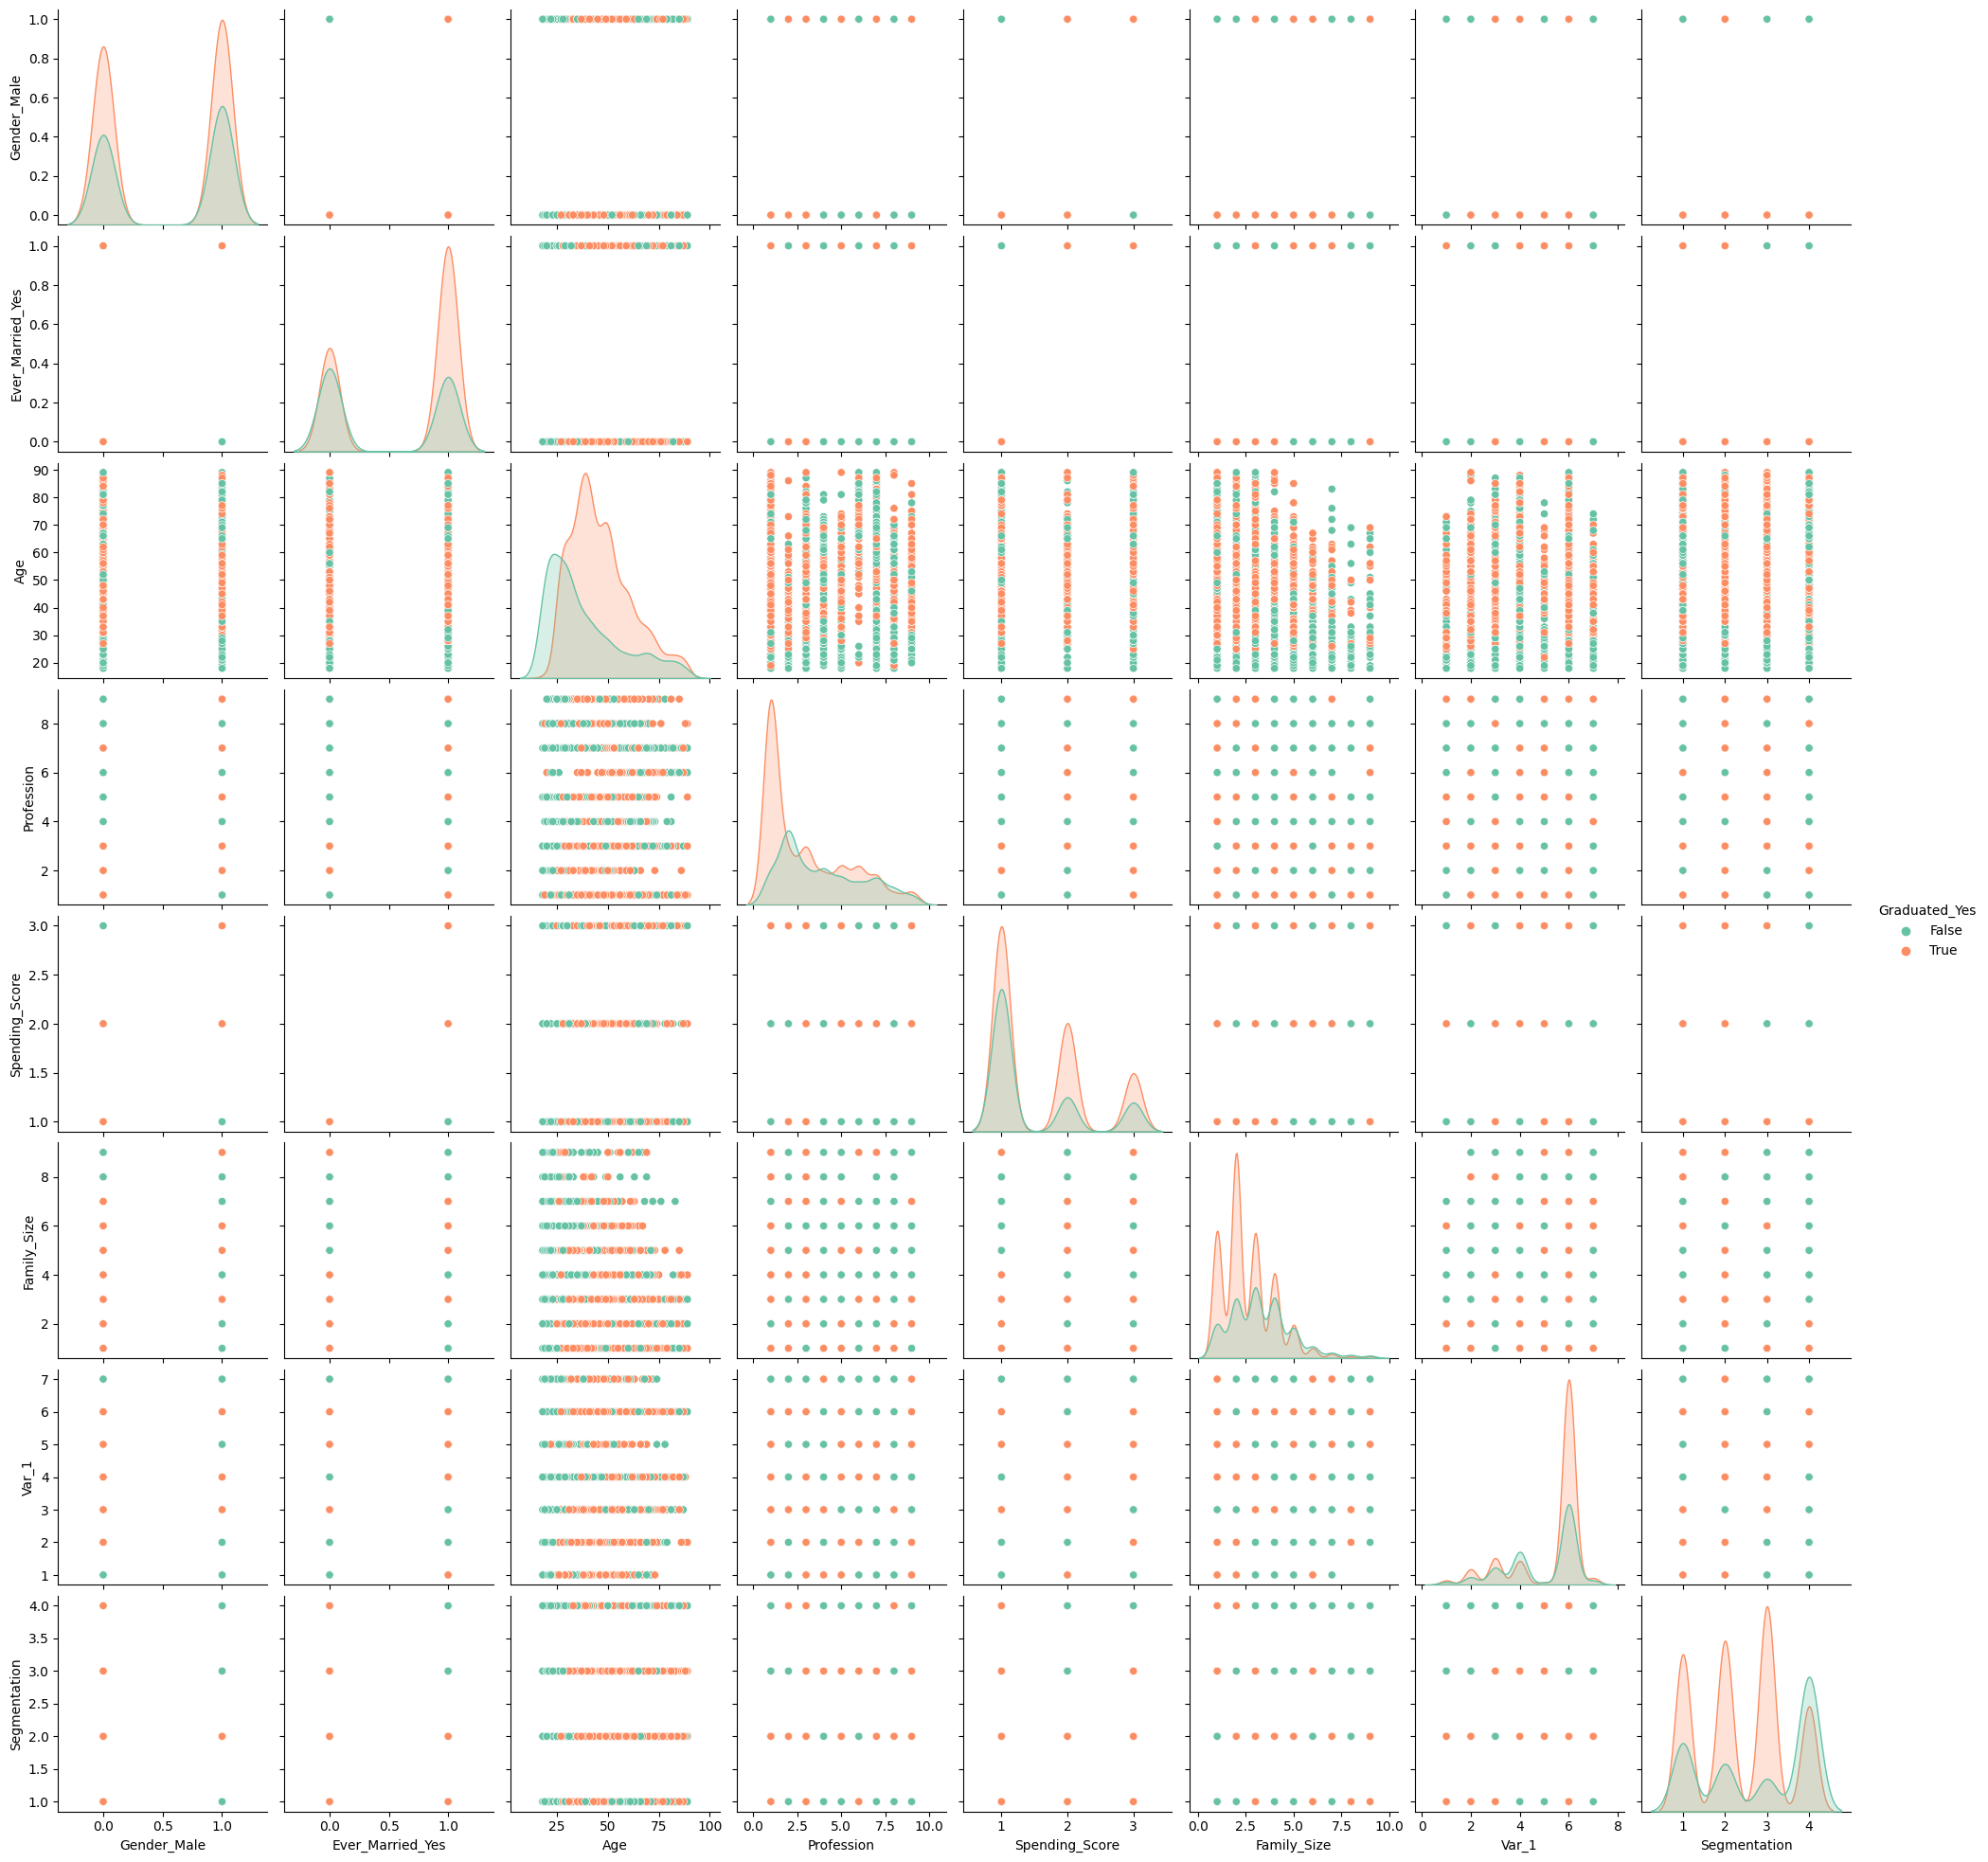

In [41]:
sns.pairplot(df2, hue = 'Graduated_Yes', palette = 'Set2')

Project 1 Conclusion
- initial dataset : Constumer Segments, included 8068 rows and 11 columns giving an overview of customers from their age and sex to their work experience and profession. 
- through EDA I was able to clean up the dataset removing Nulls, adjusting datatypes, and making decisions on which features I would work with in Project 2. 
- the use of visuals including: scatterplot, pie charts, and bar graphs helped me better understand the data and some of the relationships between different features. 


My initial thought is to use Gender_Male as the dependent variable in Project 2 and see how other features determine the sex of the Customer. 

# Project 2

In [42]:
df2.columns

Index(['Gender_Male', 'Ever_Married_Yes', 'Age', 'Graduated_Yes', 'Profession',
       'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'],
      dtype='object')

Train-Test-Split

In [43]:
feature_cols = ['Ever_Married_Yes', 'Age', 'Graduated_Yes', 'Profession',
       'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
X = df2[feature_cols]
y = df2.Gender_Male

In [44]:
#--training and testing data
from sklearn.model_selection import train_test_split

In [45]:
#--test size will be 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [46]:
#--scale the input data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Run Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=16)

#--fit the model with data
LR.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [48]:
y_pred = LR.predict(X_test)

Sample of the results after fitting the model

In [49]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

Actual  Predicted
6244   False       True
3439    True       True
1184    True       True
5733   False      False
4383    True      False
...      ...        ...
4331    True       True
4000    True       True
2165    True       True
6270    True      False
78      True       True

[1614 rows x 2 columns]

The importance, or weight of, every feature is not equal. Below is a list of the weights of each feature and then a visual that arranges them by order of weight. One thing to note is whether or not the weight is positive or negative does not play a roll in this ordering. Graduated_Yes is listed 3rd in the bar graph but has a score of -0.08765.

In [50]:
importance = LR.coef_[0]

for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

for k in enumerate(X.columns):
    print(k)
    

print('')
print(f'Intercept: {LR.intercept_}')

Feature: 0, Score: 0.29619
Feature: 1, Score: -0.01759
Feature: 2, Score: -0.08765
Feature: 3, Score: 0.00450
Feature: 4, Score: -0.06051
Feature: 5, Score: 0.11496
Feature: 6, Score: 0.06179
Feature: 7, Score: 0.07262
(0, 'Ever_Married_Yes')
(1, 'Age')
(2, 'Graduated_Yes')
(3, 'Profession')
(4, 'Spending_Score')
(5, 'Family_Size')
(6, 'Var_1')
(7, 'Segmentation')

Intercept: [0.18940968]


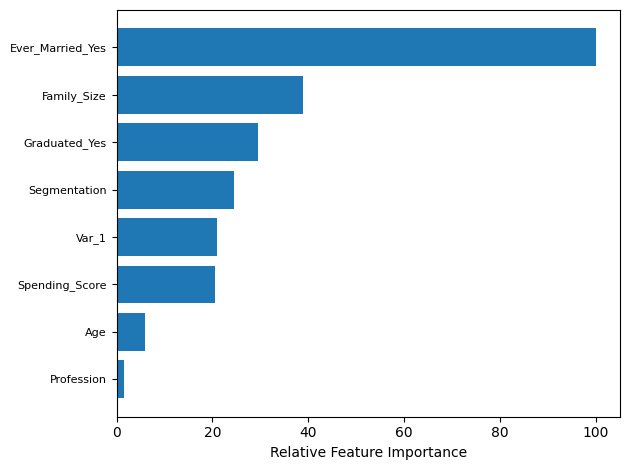

In [51]:
feature_importance = abs(LR.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Create a Confusion Matrix and then a Classification Report

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
#--how I knew to create a confusion matrix prior to this class
confusion_matrix(y_test, y_pred)

array([[223, 501],
       [171, 719]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

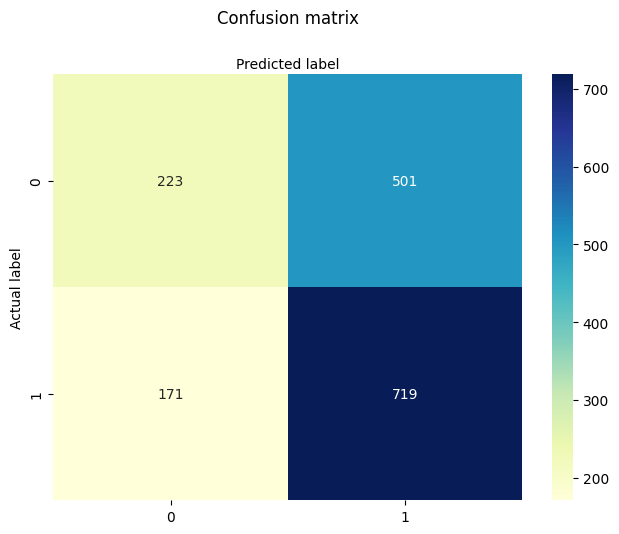

In [54]:
#--using code learned in this class
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.57      0.31      0.40       724
        True       0.59      0.81      0.68       890

    accuracy                           0.58      1614
   macro avg       0.58      0.56      0.54      1614
weighted avg       0.58      0.58      0.55      1614



Accuracy of 58% isn't great. A high recall score for men(1) and low recall score for women(0) is interesting. It seems this data wants to classify everyone as Male(1). The f1-scores reflect this. 

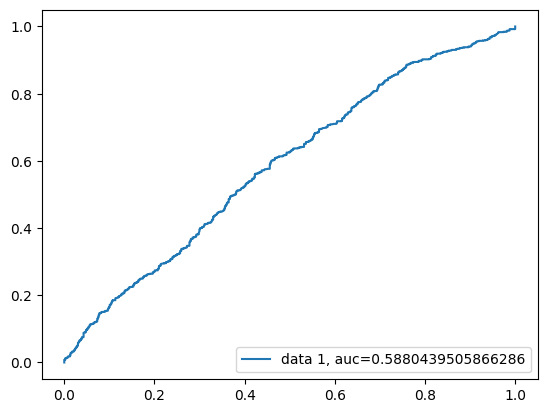

In [57]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC = 0.588 matches with the accuracy score.

Bernoulli Naive-Bayes

In [58]:
from sklearn.naive_bayes import BernoulliNB

classifer = BernoulliNB()

# train the model
classifer.fit(X_train, y_train)

# test the model
y_pred5 = classifer.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred5, y_test)

print(f'Accuracy score: {acc}')

Accuracy score: 0.6127633209417596


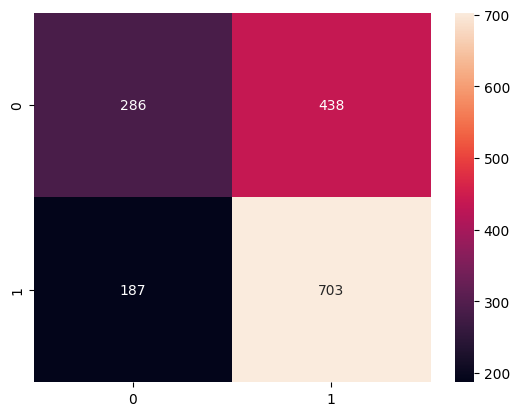

In [60]:
cm5 = confusion_matrix(y_test, y_pred5)

sns.heatmap(cm5,fmt='g', annot=True)
plt.savefig('confusion.png')

Using Bernoulli Naive-Bayes the accuracy score of 0.61276 is slightly higher. 

Try Gaussian Naive-Bayes next.

In [61]:
from sklearn.naive_bayes import GaussianNB

classifer1 = GaussianNB()

# train the model
classifer1.fit(X_train, y_train)

# test the model
y_pred6 = classifer1.predict(X_test)

In [62]:
acc1 = accuracy_score(y_test,y_pred6)

print(f'Accuracy score: {acc1}')

Accuracy score: 0.5824039653035935


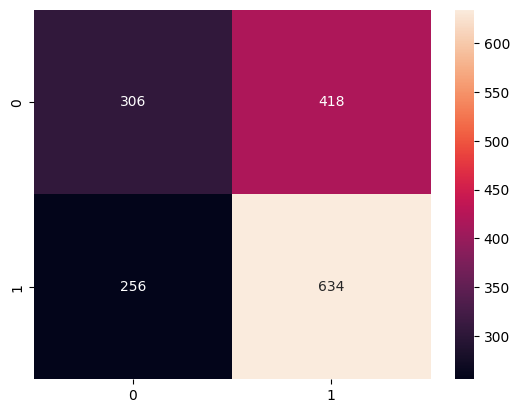

In [63]:
cm6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm6,fmt='g', annot=True)
plt.savefig('confusion.png')

Using Gaussian Naive-Bayes the accuracy is back to 0.582. 

At this point I started again with a different set of Features, specifically Ever_Married_Yes, Age, and Spending_Score. Looking back at the correlation map I made earlier these three had high, positive correlation with each other. I thought maybe this would mean something. 

Train-Test-Split, attempt 2

In [64]:
#--split dataset into features and target variable
feature_cols2 = ['Ever_Married_Yes','Age','Spending_Score']
X2 = df2[feature_cols2] # Features
y2 = df2.Gender_Male # Target variable

In [65]:
#--test size will be 30%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.3, random_state = 101)

In [66]:
#--scale the input data

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.fit_transform(X_test2)

In [67]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

#--fit the model with data
logreg.fit(X_train2, y_train2)

LogisticRegression(random_state=16)

In [68]:
y_pred2 = logreg.predict(X_test2)

In [69]:
result2 = pd.DataFrame({'Actual' : y_test2, 'Predicted' : y_pred2})
result2

Actual  Predicted
6244   False       True
3439    True       True
1184    True       True
5733   False      False
4383    True      False
...      ...        ...
104    False       True
95      True       True
7326   False       True
5445    True      False
4529   False      False

[2421 rows x 2 columns]

In [70]:
importance2 = logreg.coef_[0]

for i,j in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,j))

for k in enumerate(X2.columns):
    print(k)
    

print('')
print(f'Intercept: {logreg.intercept_}')

Feature: 0, Score: 0.26190
Feature: 1, Score: -0.09218
Feature: 2, Score: -0.02122
(0, 'Ever_Married_Yes')
(1, 'Age')
(2, 'Spending_Score')

Intercept: [0.17833057]


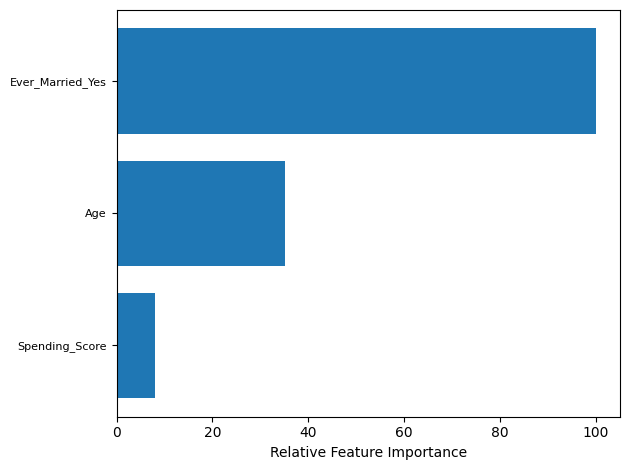

In [71]:
feature_importance1 = abs(logreg.coef_[0])
feature_importance1 = 100.0 * (feature_importance1 / feature_importance1.max())
sorted_idx = np.argsort(feature_importance1)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance1[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X2.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Text(0.5, 427.9555555555555, 'Predicted label')

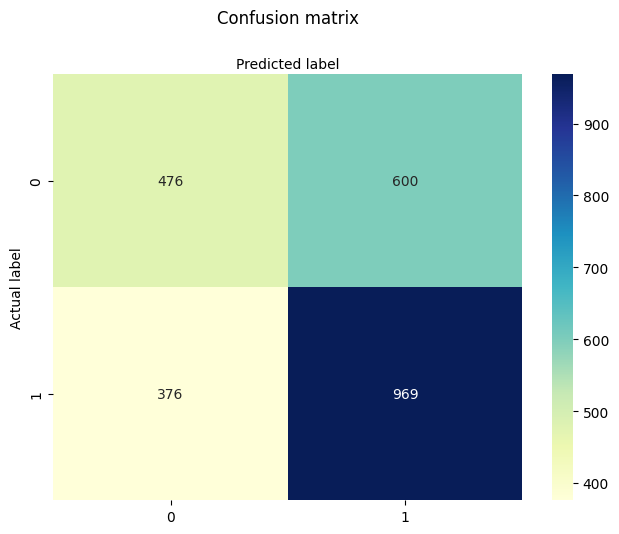

In [72]:
cm2 = metrics.confusion_matrix(y_test2, y_pred2)

class_names2=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names2))
plt.xticks(tick_marks, class_names2)
plt.yticks(tick_marks, class_names2)

sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

       False       0.56      0.44      0.49      1076
        True       0.62      0.72      0.67      1345

    accuracy                           0.60      2421
   macro avg       0.59      0.58      0.58      2421
weighted avg       0.59      0.60      0.59      2421



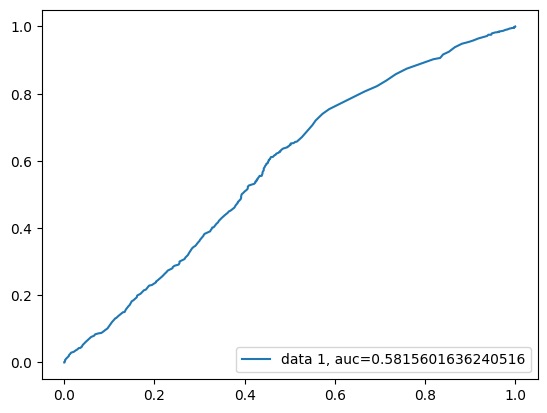

In [74]:
y_pred_proba1 = logreg.predict_proba(X_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test2, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Based on the classification report my idea to use Ever_Married_Yes, Age, and Spending_Score as the set of featured columns improved our ability to determine if the customer is male or female slightly. The f1-score for women(0) improved from 40% to 49% while the f1-score for men(0) only decreased by 1 percentage point from 68 to 67. Given this isn't a huge improvement if I were to run this again I would keep Ever_Married_Yes in my feature set and build from there. 
Other possible dependent variables could include 'Ever_Married_Yes', 'Spending_Score' or 'Segmentation'. 